In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("DS/Sales_April_2019.csv")

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [43]:
df= df.dropna()

In [44]:
df = df[df['Product'] != 'Product']

In [45]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [46]:
df['total_price'] = df['Price Each'] * df['Quantity Ordered']

#### 1---total sales for each product

In [47]:
df.groupby('Product')['total_price'].sum().reset_index()


,Product,total_price
0,20in Monitor,43446.05
1,27in 4K Gaming Monitor,220344.35
2,27in FHD Monitor,110542.63
3,34in Ultrawide Monitor,248133.47
4,AA Batteries (4-pack),10836.48
5,AAA Batteries (4-pack),8778.64
6,Apple Airpods Headphones,228750.00
7,Bose SoundSport Headphones,128787.12
8,Flatscreen TV,137700.00
9,Google Phone,348600.00


In [72]:
df.groupby('Product')['total_price'].sum().reset_index().max()


Product          iPhone
total_price    773500.0
dtype: object

#### 2-- total overall sale for all products combined

In [48]:
total_sale = df['total_price'].sum()
total_sale

3396059.11

#### 3-- avg of quantity ordered

In [49]:
avg_quan = df['Quantity Ordered'].mean()
avg_quan

1.1246104215648751

#### 4-- avg of price of each product

In [50]:
avg_price = df['Price Each'].mean()
avg_price

184.4310262999617

#### 5-- top selling products

In [51]:
group = df.groupby('Product')['Quantity Ordered'].sum()
group.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        2936
AA Batteries (4-pack)         2822
Lightning Charging Cable      2371
USB-C Charging Cable          2270
Wired Headphones              2066
Apple Airpods Headphones      1525
Bose SoundSport Headphones    1288
27in FHD Monitor               737
iPhone                         695
34in Ultrawide Monitor         653
Google Phone                   581
27in 4K Gaming Monitor         565
Flatscreen TV                  459
Macbook Pro Laptop             455
20in Monitor                   395
ThinkPad Laptop                392
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Name: Quantity Ordered, dtype: int32

#### 6-- total sales per month

In [52]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')


In [53]:
order_month = df['Order Date'].dt.to_period('M')

group_sales= df.groupby(order_month)['total_price']

monthly_sales = group_sales.sum()
monthly_sales


Order Date
2019-04    3385499.82
2019-05      10559.29
Freq: M, Name: total_price, dtype: float64

In [54]:
### another way
# df.set_index('Order Date', inplace=True)
# monthly_sales = df['total_price'].resample('M').sum()
# monthly_sales

#### 7--most_common_address

In [55]:
most_freq = df['Purchase Address'].value_counts()
most_freq

Purchase Address
821 Elm St, Austin, TX 73301               4
197 Center St, San Francisco, CA 94016     4
479 9th St, Los Angeles, CA 90001          3
930 Hickory St, San Francisco, CA 94016    3
127 Main St, Los Angeles, CA 90001         3
                                          ..
634 8th St, Boston, MA 02215               1
6 West St, New York City, NY 10001         1
687 Dogwood St, San Francisco, CA 94016    1
776 Walnut St, New York City, NY 10001     1
354 North St, Boston, MA 02215             1
Name: count, Length: 17119, dtype: int64

In [56]:
most_freq.idxmax()

'821 Elm St, Austin, TX 73301'

#### 8-- average order value

In [57]:
df['total_price'].mean()

185.68861665481984

#### 9-- yearly sales growth

In [58]:
df['Year'] = df['Order Date'].dt.year

yearly_sales = df.groupby('Year')['total_price'].sum()

yearly_growth = yearly_sales.pct_change() * 100  

yearly_growth


Year
2019   NaN
Name: total_price, dtype: float64

#### 10--- highest orders using threshold

In [59]:
threshold = 6

max_orders = df[df['Quantity Ordered'] > threshold]
max_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,Year
628,177160,AAA Batteries (4-pack),7,2.99,2019-04-26 11:37:00,"689 7th St, Dallas, TX 75001",20.93,2019


#### 11- highest priced items

In [60]:
max_priced = df.sort_values(by='Price Each', ascending=False)

In [61]:
max_priced.idxmax()

Order ID            18382
Product             14782
Quantity Ordered      628
Price Each           7777
Order Date          18355
Purchase Address    16274
total_price          4717
Year                 7777
dtype: int64

#### 12 --- total sales by product category

In [62]:
df['Category'] = df['Product'].str.split('-').str[0]

sales_category= df.groupby('Category')['Quantity Ordered'].sum()


In [63]:
sales_category

Category
20in Monitor                   395
27in 4K Gaming Monitor         565
27in FHD Monitor               737
34in Ultrawide Monitor         653
AA Batteries (4               2822
AAA Batteries (4              2936
Apple Airpods Headphones      1525
Bose SoundSport Headphones    1288
Flatscreen TV                  459
Google Phone                   581
LG Dryer                        77
LG Washing Machine              61
Lightning Charging Cable      2371
Macbook Pro Laptop             455
ThinkPad Laptop                392
USB                           2270
Vareebadd Phone                220
Wired Headphones              2066
iPhone                         695
Name: Quantity Ordered, dtype: int32

#### 13--top selling each month

## **** 
#### print("Best-selling product in", df['Order Date'].dt.strftime('%B %Y').iloc[0], "is", best_selling['Product'])


In [64]:

df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

product_sales = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

best_selling = product_sales.loc[product_sales['Quantity Ordered'].idxmax()]

    
print("Best-selling product in", df['Order Date'].dt.strftime('%B %Y').iloc[0], "is", best_selling['Product'])


Best-selling product in April 2019 is AAA Batteries (4-pack)


#### 14-- total order value per city

In [65]:
df['City'] = df['Purchase Address'].str.split(',').str[1]
df.groupby('City')['total_price'].mean()


City
 Atlanta          193.243832
 Austin           177.475427
 Boston           184.504776
 Dallas           187.289237
 Los Angeles      182.220446
 New York City    183.478956
 Portland         194.929757
 San Francisco    184.150275
 Seattle          191.407933
Name: total_price, dtype: float64

#### 15-- corr betwn quantity and price of each product

In [66]:
corr= df['Quantity Ordered'].corr(df['Price Each'])
corr


-0.15044007218519315

In [67]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'total_price', 'Year', 'Category', 'Month', 'City'],
      dtype='object')

In [68]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,Year,Category,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,USB,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,Bose SoundSport Headphones,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,Google Phone,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,Wired Headphones,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,Wired Headphones,4,Los Angeles


<Axes: xlabel='City', ylabel='Count'>

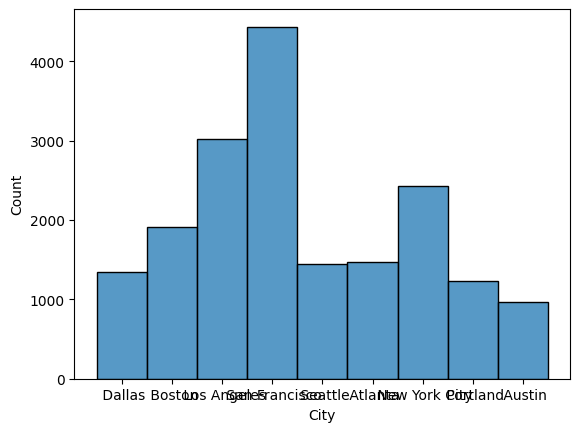

In [69]:
import seaborn as sns
sns.histplot(df['City'])

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ' Dallas'),
  Text(1, 0, ' Boston'),
  Text(2, 0, ' Los Angeles'),
  Text(3, 0, ' San Francisco'),
  Text(4, 0, ' Seattle'),
  Text(5, 0, ' Atlanta'),
  Text(6, 0, ' New York City'),
  Text(7, 0, ' Portland'),
  Text(8, 0, ' Austin')])

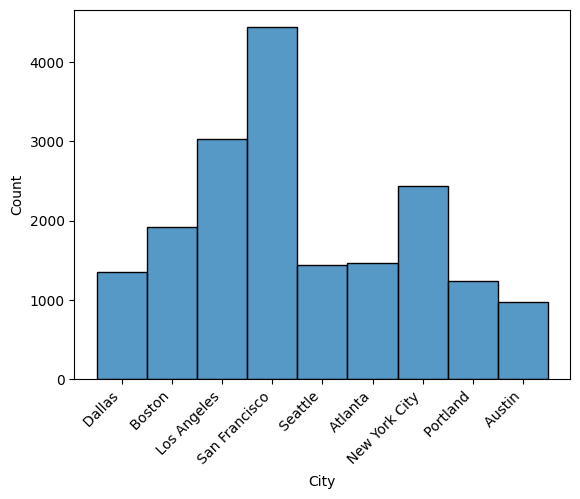

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='City')
plt.xticks(rotation=45, ha='right')


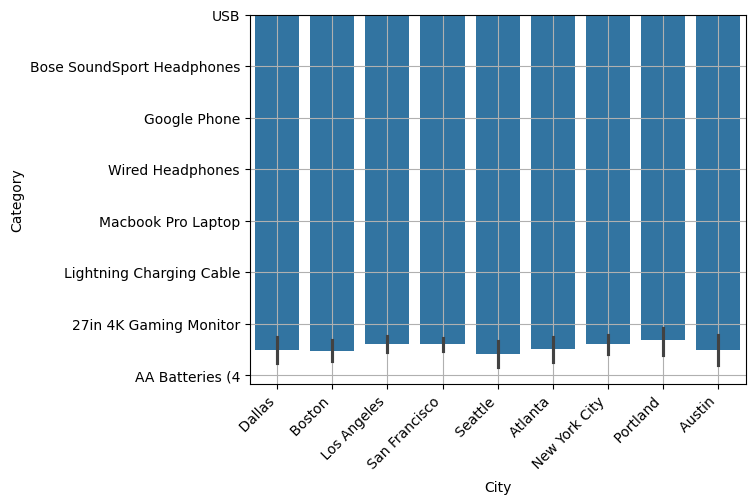

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=df, x='City', y='Category')

plt.ylabel('Category')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [76]:
df.describe()

,Quantity Ordered,Price Each,Order Date,total_price,Year,Month
count,18289.00000,18289.000000,18289,18289.000000,18289.0,18289.000000
mean,1.12461,184.431026,2019-04-16 03:16:12.443545344,185.688617,2019.0,4.001531
min,1.00000,2.990000,2019-04-01 03:09:00,2.990000,2019.0,4.000000
25%,1.00000,11.950000,2019-04-08 17:09:00,11.950000,2019.0,4.000000
50%,1.00000,14.950000,2019-04-16 00:47:00,14.950000,2019.0,4.000000
75%,1.00000,150.000000,2019-04-23 15:18:00,150.000000,2019.0,4.000000
max,7.00000,1700.000000,2019-05-01 04:25:00,3400.000000,2019.0,5.000000
std,0.43641,330.913377,NaN,332.225363,0.0,0.039099


In [85]:
import pandas as pd

# Assuming df is your DataFrame containing sales data

# Group the data by 'City' and 'Category', then count the occurrences of each category
category_counts = df.groupby(['City', 'Category']).size().reset_index(name='Count')

print(category_counts)


         City                Category  Count
0     Atlanta            20in Monitor     30
1     Atlanta  27in 4K Gaming Monitor     35
2     Atlanta        27in FHD Monitor     67
3     Atlanta  34in Ultrawide Monitor     41
4     Atlanta         AA Batteries (4    162
..        ...                     ...    ...
166   Seattle         ThinkPad Laptop     37
167   Seattle                     USB    153
168   Seattle         Vareebadd Phone     21
169   Seattle        Wired Headphones    158
170   Seattle                  iPhone     48

[171 rows x 3 columns]


In [86]:
df.groupby(['City', 'Category']).size().reset_index(name='Count')


,City,Category,Count
0,Atlanta,20in Monitor,30
1,Atlanta,27in 4K Gaming Monitor,35
2,Atlanta,27in FHD Monitor,67
3,Atlanta,34in Ultrawide Monitor,41
4,Atlanta,AA Batteries (4,162
...,...,...,...
166,Seattle,ThinkPad Laptop,37
167,Seattle,USB,153
168,Seattle,Vareebadd Phone,21
169,Seattle,Wired Headphones,158


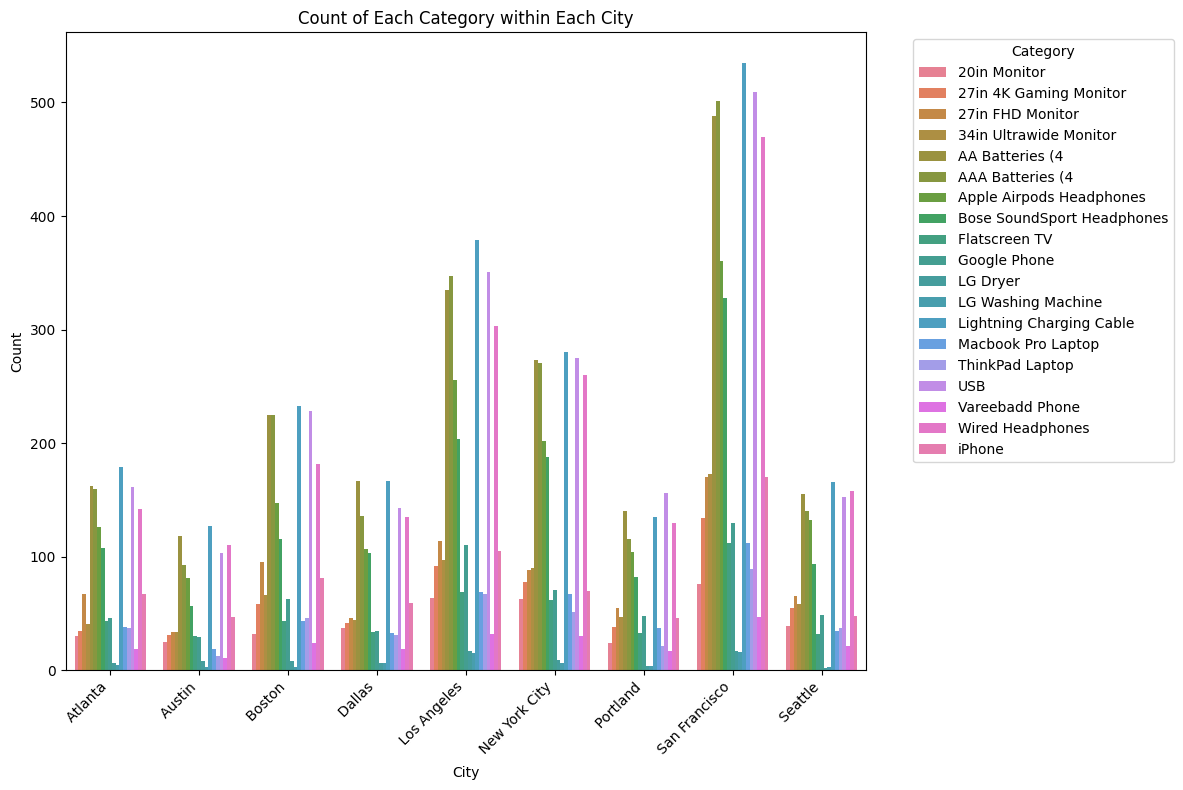

In [87]:
category_counts = df.groupby(['City', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(data=category_counts, x='City', y='Count', hue='Category')
plt.title('Count of Each Category within Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()